[![Open In Wolfram Cloud](https://raw.githubusercontent.com/dmse-mit/3029/main/files/wolfram-badge.svg)](https://www.wolframcloud.com/obj/gvarnavi/Published/3029-SP22__L02__hamiltonian-mechanics__02-02-22.nb)

# Hamiltonian Mechanics

## Double Pendulum

Notice we specified our ODE above using the angle the pendulum makes with the vertical (gravity) direction, instead of the (x,y) coordinates of the pendulum bob.

This often simplifies the mathematics and makes the underlying physics more easily apparent.

Let's look at the more complicated example of the double pendulum:  
![double pendulum](https://www.wolfram.com/mathematica/new-in-9/advanced-hybrid-and-differential-algebraic-equations/HTMLImages.en/double-pendulum/In_87.png)

We can indeed model this using Newton's equations of motion:

$$
\begin{aligned}
m x''(t) &= \sum F_x \\
m y''(t) &= \sum F_y
\end{aligned}
$$

In [1]:
differentialEqs={
  m[1] x[1]''[t]==(\[Lambda][1][t]/l[1]) x[1][t]-(\[Lambda][2][t]/l[2]) (x[2][t]-x[1][t]),
  m[1] y[1]''[t]==(\[Lambda][1][t]/l[1]) y[1][t]-(\[Lambda][2][t]/l[2]) (y[2][t]-y[1][t])-m[1] g,
  m[2] x[2]''[t]==(\[Lambda][2][t]/l[2]) (x[2][t]-x[1][t]),
  m[2] y[2]''[t]==(\[Lambda][2][t]/l[2]) (y[2][t]-y[1][t])-m[2] g
};

Using the algebraic constraints for fixed rod lengths

In [2]:
algebraicEqs={
  x[1][t]^2+y[1][t]^2==l[1]^2,
  (x[2][t]-x[1][t])^2+(y[2][t]-y[1][t])^2==l[2]^2
};

And the initial conditions

In [3]:
initialConditions={
x[1][0]==l[1],
y[1][0]==0,
x[1]'[0]==0,
y[1]'[0]==0,
x[2][0]==l[1],
y[2][0]==-l[2],
x[2]'[0]==0,
y[2]'[0]==0
};

In [4]:
parameters={g->9.81,m[1]->1,m[2]->2,l[1]->1,l[2]->1};

numericalSolutions=NDSolveValue[
  {differentialEqs,algebraicEqs,initialConditions}/.parameters,
  {x[1],y[1],x[2],y[2],\[Lambda][1],\[Lambda][2]},{t,0,15},
  Method->{"IndexReduction"->{Automatic,"IndexGoal"->0}}];

Let's visualize the solution:

In [6]:
visualizeDoublePendulum[{{x1_, y1_}, {x2_, y2_}},colors_ : {Red, Blue}][t_] := Show[
  Graphics[{
    Line[{{0, 0}, {x1[t], y1[t]}, {x2[t], y2[t]}}],
    PointSize[0.05], Red, Point[{x1[t], y1[t]}], Blue, 
    Point[{x2[t], y2[t]}]
    }, PlotRange -> 2.025 {{-1, 1}, {-1, 0}}],
  
  ParametricPlot[{
    {x1[tau], y1[tau]},
    {x2[tau], y2[tau]}
    }, {tau, 0, t}, PlotStyle -> {Directive[Red,Thin], Directive[Blue,Thin]}],ImageSize->125]

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-
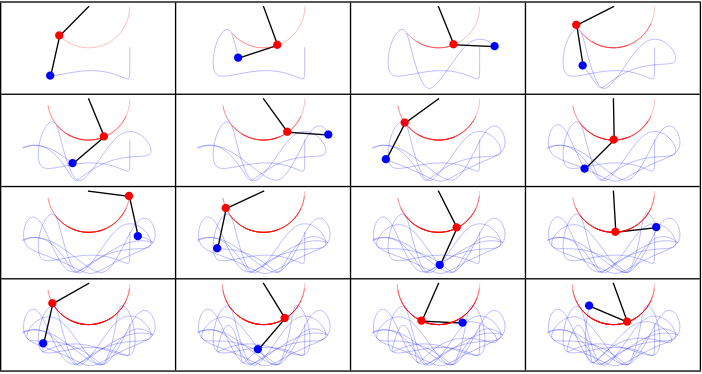

In [7]:
With[{sols = Take[numericalSolutions, 4]},
 Multicolumn[Table[
   visualizeDoublePendulum[Partition[sols, 2]][t],
   {t, Rest@Subdivide[0, 15, 16]}], 4, Appearance -> "Horizontal", 
  Frame -> All]
 ]

Notice the above trigonometry was rather cumbersome.  
In-fact, what we wrote down are known as a Differential - Algebraic Equations (DAEs). which we asked Mathematica to Reduce to an ODE automatically for us

## Hamilton's Equations

There are three main equivalent Classical mechanics formalisms you might've come across:  
- Newtonian Mechanics
  - Local method (particles obey Newton's second law at each point in time)
- Lagrangian Mechanics
  - Global method (particles evolve according to the Euler-Lagrange equation and the principle of Least Action)
- Hamiltonian Mechanics
  - Global method (particles evolve according to Hamilton's equations)

(For time-independent potentials), we can define the  system **Lagrangian** using:

$$
\mathcal{L}(\{q\},\{\dot{q}\}) = \mathcal{T}-\mathcal{V}
$$

where $T$ and $V$ are the total kinetic and potential energies of the system and $q$ are **generalized coordinates** (e.g. the pendulum angle), and express the **Euler-Lagrange equations** as:

$$
\frac{d}{dt} \left(\frac{\partial \mathcal{L}}{\partial \dot{q}_i}\right)= \left(\frac{\partial \mathcal{L}}{\partial q_i}\right)
$$

Hamilton's equations are slightly more useful for us (you will encounter them next semester in your quantum-mechanics course!)  

We define a canonical **momentum conjugate**:

$$
p_i =\frac{\partial \mathcal{L}}{\partial \dot{q}_i}
$$

and use it to express the system **Hamiltonian**:

$$
\mathcal{H}(\{q\},\{p\}) =\sum_i p_i \dot{q}_i -\mathcal{L}(\{q\},\{\dot{q}\}) =  \mathcal{T}+\mathcal{V}
$$

We can now express Hamilton's canonical equations:

$$
\begin{aligned}
\frac{\partial \mathcal{H}}{\partial p_i} &= \dot{q}_i \\
\frac{\partial \mathcal{H}}{\partial q_i} &= -\dot{p}_i
\end{aligned}
$$

As a warm-up exercise, let's derive the equations of motion for the simple pendulum.  
We want to do an **energy balance**:

$$
\begin{aligned}
    V &= -m g L \left(\cos (\theta)\right) \\
    T &= \frac{m v^2}{2} = \frac{m L^2 \dot{\theta}^2}{2}
\end{aligned}
$$

And then apply Hamilton's equations **"blindly"**:

$$
\begin{aligned}
\dot{\theta}&=\frac{p}{mL^2} \\
\mathcal{H}(\theta,p) &= \mathcal{T}+\mathcal{V} =\frac{p^2}{2mL^2}-mgL\cos(\theta) \\
\dot{p} &= -\frac{\partial H}{\partial \theta}=-mgL\sin(\theta) \\ 
\ddot{\theta}&= \frac{\dot{p}}{m L^2}=-\frac{g}{L}\sin(\theta)
\end{aligned}
$$

For the double pendulum problem we can follow the same procedure:  
1. Write down the kinetic and potential energies:

In [8]:
horizontalPosition[1] = l[1] Sin[\[Theta][1][t]];
horizontalPosition[2] = horizontalPosition[1] + l[2] Sin[\[Theta][2][t]];

verticalPosition[1] = -l[1] Cos[\[Theta][1][t]];
verticalPosition[2] = verticalPosition[1] - l[2] Cos[\[Theta][2][t]];

In [12]:
kineticEnergy = Simplify[Sum[
    1/2 m[index] (D[horizontalPosition[index], t]^2 + D[verticalPosition[index], t]^2), {index, 2}]];
    
potentialEnergy= Simplify[m[1] g verticalPosition[1] + m[2] g verticalPosition[2]]; 

2. Construct the total Lagrangian and Hamiltonian

In [15]:
lagrangian = kineticEnergy - potentialEnergy;
hamiltonian = kineticEnergy + potentialEnergy;

3. We want to express our Hamiltonian above (which is still in $\theta_i$ and $\dot{\theta}_i$ terms) in generalized coordinates and momenta:

$$
p_i =\frac{\partial \mathcal{L}}{\partial \dot{q}_i}
$$

In [17]:
substitutions = First[
   Solve[{
     p[1][t] == D[lagrangian, \[Theta][1]'[t]],
     p[2][t] == D[lagrangian, \[Theta][2]'[t]]
     }, {\[Theta][1]'[t], \[Theta][2]'[t]}]
   ];
   
canonicalHamiltonian = Simplify[hamiltonian /. substitutions 
  /. {\[Theta][1][t] -> q[1][t], \[Theta][2][t] -> q[2][t]}];

**Note:** This looks fairly complicated to write out by hand. But we didn't have to do any of the hard work!

4. Write down Hamilton's equations

In [20]:
hamiltonsEquations = {
   D[q[1][t], t] == D[canonicalHamiltonian, p[1][t]],
   D[q[2][t], t] == D[canonicalHamiltonian, p[2][t]],
   D[p[1][t], t] == -D[canonicalHamiltonian, q[1][t]],
   D[p[2][t], t] == -D[canonicalHamiltonian, q[2][t]]
   };

5. Specify initial conditions and solve

In [21]:
ics = {q[1][0] == \[Pi]/2, q[2][0] == 0, p[1][0] == 0, p[2][0] == 0};
{q1Sol, q2Sol, p1Sol, p2Sol} = NDSolveValue[Join[hamiltonsEquations /. parameters, ics],
   {q[1], q[2], p[1], p[2]}, {t, 0, 100}];

Finally, let's visualize our solution!

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-
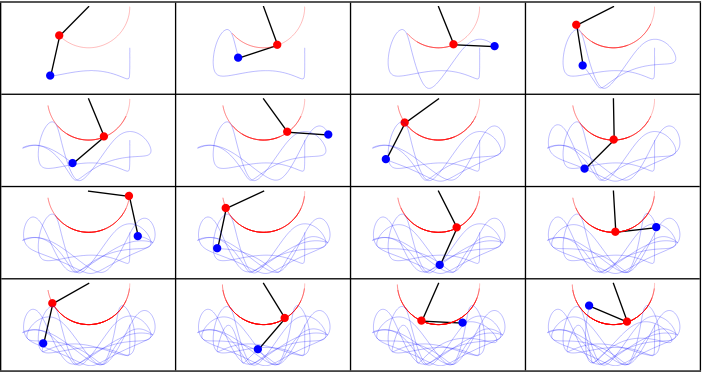

In [23]:
Module[{x1, x2, y1, y2},
 x1[t_]  =   Sin[q1Sol[t]];
 x2[t_] =   Sin[q1Sol[t]] + Sin[q2Sol[t]];
 y1[t_]  = -Cos[q1Sol[t]];
 y2[t_]  = -Cos[q1Sol[t]] - Cos[q2Sol[t]];
 
 Multicolumn[
  Table[visualizeDoublePendulum[{{x1, y1}, {x2, y2}}][t], {t, 
    Rest@Subdivide[0, 15, 16]}], 4, Appearance -> "Horizontal", 
  Frame -> All]
 
 ]

## Diatomic Molecule

(Time-permitting) let's do one more example!

That of a diatomic molecule, connected by a simple spring

![diatomic molecule](https://www.researchgate.net/profile/Riana-Gaifulina-2/publication/348270527/figure/fig7/AS:976964533907460@1609937904319/Diatomic-molecule-represented-as-two-masses-connected-by-a-vibrating-spring-taken-from.jpg)

We'll denote the generalized coordinates as $x_1$ and $x_2$.

Let's follow our 5-step procedure again:

1. Write down the kinetic and potential energies

In [24]:
moleculeKineticEnergy = Simplify[Sum[1/2 m[index] D[x[index][t], t]^2 , {index, 2}]];
moleculePotentialEnergy = Simplify[\[Kappa]/2 (x[2][t] - x[1][t] - springLength)^2];

2. Construct the total Lagrangian and Hamiltonian

In [26]:
moleculeLagrangian = Simplify[moleculeKineticEnergy - moleculePotentialEnergy];
moleculeHamiltonian = Simplify[moleculeKineticEnergy + moleculePotentialEnergy];

3. Find our generalized momenta 
$$
p_i = \frac{\partial L}{\partial \dot{q}_i}
$$

In [28]:
moleculeSubstitutions = First[
 Solve[{
    p[1][t] == D[moleculeLagrangian, x[1]'[t]],
    p[2][t] == D[moleculeLagrangian, x[2]'[t]]
    }, {x[1]'[t], x[2]'[t]}]
  ];

**Note:** We could've easily inferred this form.  
In 8.01, you probably simply stated that the momentum of a free particle is $p(t) = m v(t) = m x'(t)$.
However, this programmatic way of getting the generalized momenta generalized very nicely. E.g. the momenta of the bobs in our double pendulum above are by no means intuitive.

In [29]:
moleculeCanonicalHamiltonian = Simplify[moleculeHamiltonian /. 
    moleculeSubstitutions /. {x[1][t] -> q[1][t], x[2][t] -> q[2][t]}];

4. Write down Hamilton's equations

In [30]:
Column[
 moleculeHamiltonsEquations = {
   D[q[1][t], t] == D[moleculeCanonicalHamiltonian, p[1][t]],
   D[q[2][t], t] == D[moleculeCanonicalHamiltonian, p[2][t]],
   D[p[1][t], t] == -D[moleculeCanonicalHamiltonian, q[1][t]],
   D[p[2][t], t] == -D[moleculeCanonicalHamiltonian, q[2][t]]
   }
 ];

5. Specify initial conditions and solve  
Here, we'll stretch the spring b 50%, by specifying $q_1(0)=-3/4L$ and $q_2(0)= 3/4L$

In [31]:
moleculeICs = {q[1][0] == -3 springLength/4, q[2][0] == 3 springLength/4, p[1][0] == 0, p[2][0] == 0};

{  moleculePosition[springLength_, \[Kappa]_, m1_, m2_][1][t_],
   moleculePosition[springLength_, \[Kappa]_, m1_, m2_][2][t_],
   moleculeMomentum[springLength_, \[Kappa]_, m1_, m2_][1][t_],
   moleculeMomentum[springLength_, \[Kappa]_, m1_, m2_[2][t_]]} = FullSimplify[
    DSolveValue[
     Join[moleculeHamiltonsEquations, moleculeICs], {q[1][t], q[2][t],p[1][t], p[2][t]}, t],
      {springLength > 0, m[1] > 0, m[2] > 0}] /. {m[1] -> m1, m[2] -> m2};

### Visualization

Finally, let's visualize our dimer!  

Here's a handy function to make a spring. Ask me about it (either now or during Show & Tell!)

In [33]:
spring[start_ : {0, 0}, end_ : {1, 0}, n_ : 20, w_ : .2] := 
 With[{vector = end - start},
  BSplineCurve@(start + # & /@ 
       Transpose[{vector, -Cross[vector]} . {(# - 1)/(2 n), 
          Re[I^#] w/Norm[vector]}] &@Range[2 n + 1])]

In [34]:
visualizeDimer[{x1_, x2_}, {springLength_, m1_, m2_}, colors_ : {Red, Blue}][t_] := 
 Graphics[{spring[{x1[t] + Sqrt[m1], 0}, {x2[t] - Sqrt[m2], 0}],
   Red, Disk[{x1[t], 0}, Sqrt[m1]], Blue, Disk[{x2[t], 0}, Sqrt[m2]]}, 
   PlotRange -> {springLength {-1.1, 1.1}, {-1/4, 1/4}}, Axes -> True, Ticks -> None,ImageSize->125]

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-
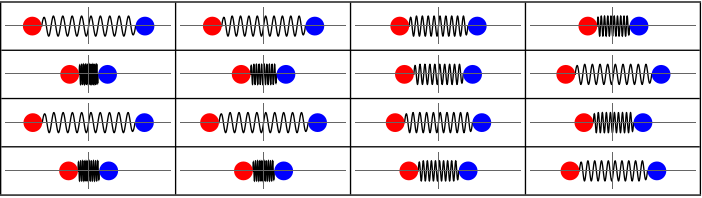

In [35]:
Multicolumn[Table[
 visualizeDimer[{
   moleculePosition[1, 1, 1/8^2, 1/8^2][1],
   moleculePosition[1, 1, 1/8^2, 1/8^2][2]}, {1, 1/8^2, 1/8^2}][t],
   {t,Subdivide[15]}],4, Appearance -> "Horizontal", Frame -> All]

### Lennard Jones Potential

Let's generalize this for the LJ potential!  

Notice - the only thing we need to change really is the potential energy function. We'll use the normalized Lennard Jones potential

$$

U_{\mathrm{ljp}}(\rho) = \frac{1}{\rho^{12}}-\frac{2}{\rho^6}

$$

And then simply re-run all the steps!

In [36]:
moleculePotentialEnergyLJ = Simplify[With[{\[Rho] = x[2][t] - x[1][t]}, 1/\[Rho]^12 - 2/\[Rho]^6]];

moleculeLagrangianLJ = Simplify[moleculeKineticEnergy - moleculePotentialEnergyLJ];
moleculeHamiltonianLJ = Simplify[moleculeKineticEnergy + moleculePotentialEnergyLJ];

moleculeSubstitutionsLJ = First[
   Solve[{
     p[1][t] == D[moleculeLagrangianLJ, x[1]'[t]],
     p[2][t] == D[moleculeLagrangianLJ, x[2]'[t]]
     }, {x[1]'[t], x[2]'[t]}]
   ];

moleculeCanonicalHamiltonianLJ = Simplify[moleculeHamiltonianLJ /. moleculeSubstitutionsLJ 
  /. {x[1][t] -> q[1][t], x[2][t] -> q[2][t]}];

moleculeHamiltonsEquationsLJ = {
   D[q[1][t], t] == D[moleculeCanonicalHamiltonianLJ, p[1][t]],
   D[q[2][t], t] == D[moleculeCanonicalHamiltonianLJ, p[2][t]],
   D[p[1][t], t] == -D[moleculeCanonicalHamiltonianLJ, q[1][t]],
   D[p[2][t], t] == -D[moleculeCanonicalHamiltonianLJ, q[2][t]]
   };

moleculeICsLJ = {q[1][0] == -3/4, q[2][0] == 3/4, p[1][0] == 0, p[2][0] == 0};
moleculeSolutionsLJ = 
  ParametricNDSolveValue[
   Join[moleculeHamiltonsEquationsLJ, moleculeICsLJ], {q[1], q[2], 
    p[1], p[2]}, {t, 0, 1}, {m[1], m[2]}];

To get a nice animation!

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-   -Graphics-
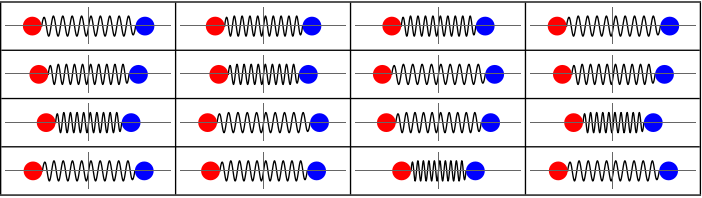

In [44]:
Multicolumn[
 Table[visualizeDimer[
    Take[moleculeSolutionsLJ[1/8^2, 1/8^2], 2], {1, 1/8^2, 1/8^2}][t], 
    {t, Subdivide[15]}], 4, Appearance -> "Horizontal", Frame -> All]

This appears to be highly non-linear behavior. Let's investigate further!

In [53]:
baseLJGraphic = Plot[1/\[Rho]^12 - 2/\[Rho]^6, {\[Rho], 3/4, 3/2}, 
   PlotStyle -> Directive[RGBColor[0, 1/3, 0], Thick], Frame -> True, 
   FrameStyle -> Directive[Black, Thick], 
   FrameLabel -> {"Separation distance, \[Rho]", "Energy, \!\(\*SubscriptBox[\(U\), \(ljp\)]\)(\[Rho])"}, 
   BaseStyle -> 12, ImageSize -> 200];

In [46]:
visualizeDimerPlusPotential[{x1_, x2_}, {springLength_, m1_, m2_}, colors_ : {Red, Blue}][t_] := 
Block[{distance = x2[t] - x1[t]},
Show[baseLJGraphic, Graphics[{
     PointSize[0.0375], Point[{distance, 1/distance^12 - 2/distance^6}],
     Inset[visualizeDimer[{x1, x2}, {springLength, m1, m2}, colors][t],{1.25, 1.5}, {0, 0}, 0.5]
     }]]]

-Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-

-Graphics-   -Graphics-   -Graphics-
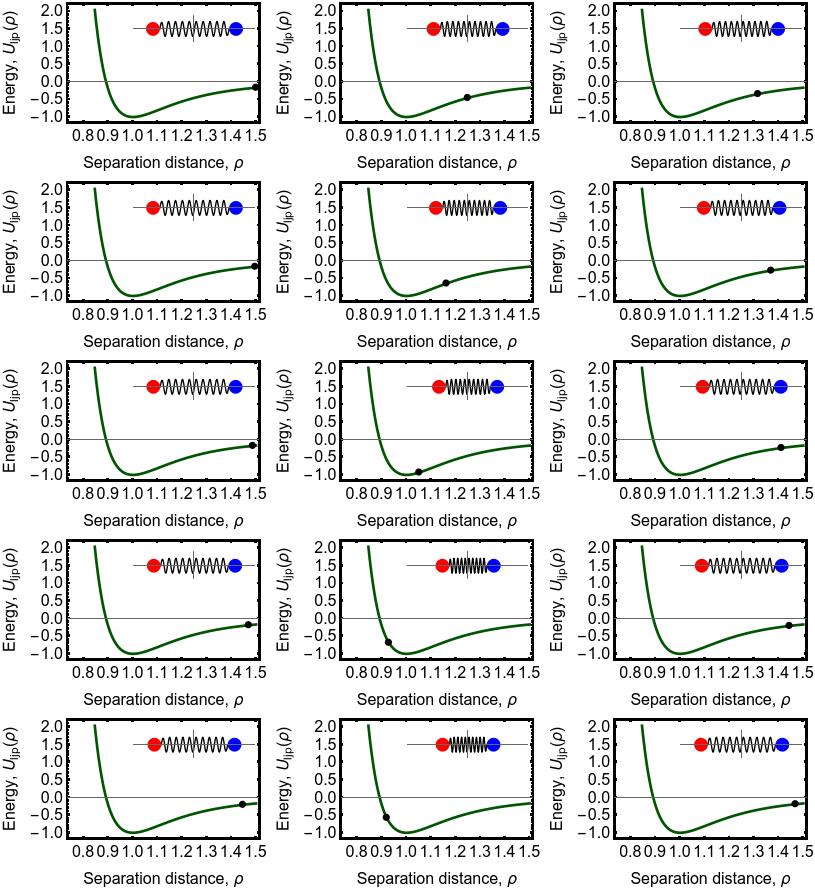

In [55]:
Multicolumn[
 Table[visualizeDimerPlusPotential[
    Take[moleculeSolutionsLJ[1/8^2, 1/8^2], 2], {1, 1/8^2, 1/8^2}][t], 
    {t, Subdivide[14]}], 3, Appearance -> "Horizontal"]